### CNN-Intel-Image

In [1]:
#https://www.kaggle.com/devdgohil/intel-image-classification


import math
import os
import cv2
from random import randint
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from PIL import Image
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Model, layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.regularizers import l2

In [2]:
train_datagen = ImageDataGenerator(
    zoom_range=0.2,        
    rotation_range=10,    
    horizontal_flip=True,
    rescale=1./255)      

train_generator = train_datagen.flow_from_directory(
    'c:/workspace3/data/images/intel-image-classification/seg_train/seg_train',
    batch_size=1,      
    class_mode='sparse',
#               원-핫인코딩 X
    target_size=(150, 150))  

test_datagen = ImageDataGenerator(
    zoom_range=0.2,        
    rotation_range=10,    
    horizontal_flip=True,  
    rescale=1./255)      

test_generator = test_datagen.flow_from_directory(
    'c:/workspace3/data/images/intel-image-classification/seg_test/seg_test',
    batch_size=1,
    class_mode='sparse',
    target_size=(150, 150))

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [3]:
import numpy as np

batch_size=1
n_img = train_generator.n
steps = n_img // batch_size
X_train, y_train = [], []

for i in range(steps):
    a, b = train_generator.next()
    X_train.extend(a)
    y_train.extend(b)
    if i > 500:
        break
  
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

X_train.shape, y_train.shape

((502, 150, 150, 3), (502,))

In [4]:
import numpy as np

batch_size=1
n_img = train_generator.n
steps = n_img // batch_size
X_test, y_test = [], []

for i in range(steps):
    a, b = train_generator.next()
    X_test.extend(a)
    y_test.extend(b)
    if i > 100:
        break

X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

X_test.shape, y_test.shape

((102, 150, 150, 3), (102,))

In [5]:
def findKey(indices, search_value):
    for key, value in indices.items():
        if(value == search_value):
            return key
    return -1

Found 14034 images belonging to 6 classes.


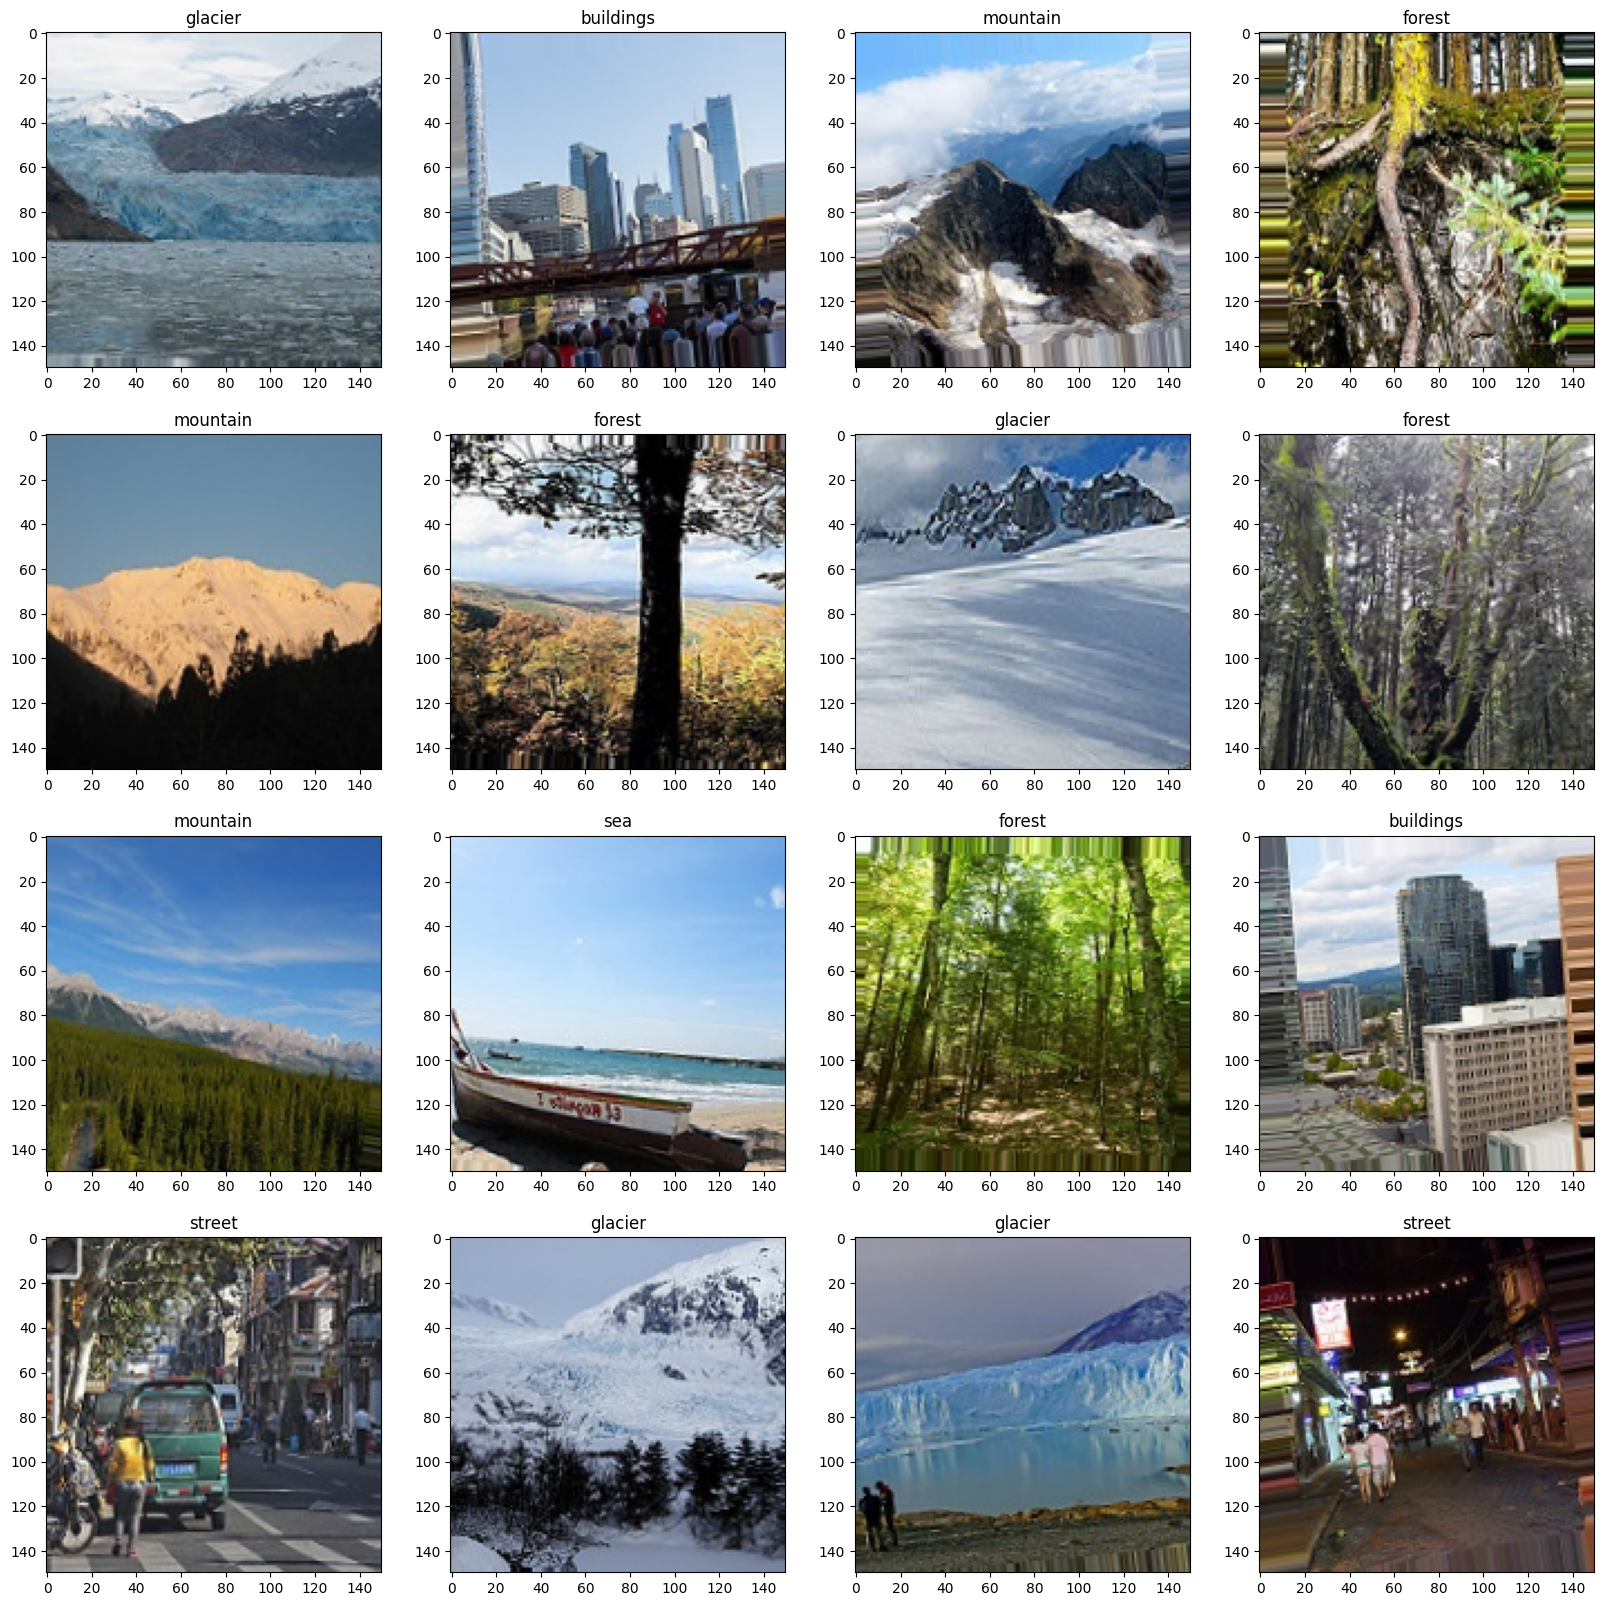

In [6]:
for X_batch, y_batch in train_datagen.flow_from_directory('c:/workspace3/data/images/intel-image-classification/seg_train/seg_train',batch_size=16, class_mode='sparse', target_size=(150, 150)):
    plt.figure(figsize=(20,20))

    for i in range(0, 16):
        ax = plt.subplot(4, 4, i+1)
        ax.set_title(findKey(train_generator.class_indices, y_batch[i]))  

        plt.imshow((X_batch[i].reshape(150, 150, 3)*255).astype(np.uint8))

    plt.show()
    break

In [7]:
model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3), name="conv1"))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', name="conv2"))
model.add(MaxPooling2D(pool_size=(3, 3), name="maxpool1"))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', name="conv3"))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', name="conv4"))
model.add(MaxPooling2D(pool_size=(3, 3), name="maxpool2"))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', name="conv5"))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', name="conv6"))
model.add(MaxPooling2D(pool_size=(3, 3), name="maxpool3"))

model.add(Flatten())

model.add(Dense(1024, activation='relu', kernel_regularizer=l2(0.001), bias_regularizer=l2(0.001)))
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001), bias_regularizer=l2(0.001)))

model.add(Dropout(0.25))

model.add(Dense(6, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(learning_rate=0.0001),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 148, 148, 64)      1792      
                                                                 
 conv2 (Conv2D)              (None, 146, 146, 64)      36928     
                                                                 
 maxpool1 (MaxPooling2D)     (None, 48, 48, 64)        0         
                                                                 
 conv3 (Conv2D)              (None, 46, 46, 128)       73856     
                                                                 
 conv4 (Conv2D)              (None, 44, 44, 128)       147584    
                                                                 
 maxpool2 (MaxPooling2D)     (None, 14, 14, 128)       0         
                                                                 
 conv5 (Conv2D)              (None, 12, 12, 256)       2

In [8]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test,y_test))         

Epoch 1/10
16/16 [==============================] - 8s 280ms/step - loss: 3.5510 - accuracy: 0.2012 - val_loss: 3.4608 - val_accuracy: 0.1961
Epoch 2/10
16/16 [==============================] - 3s 176ms/step - loss: 3.3262 - accuracy: 0.3008 - val_loss: 3.1256 - val_accuracy: 0.3627
Epoch 3/10
16/16 [==============================] - 3s 176ms/step - loss: 2.9791 - accuracy: 0.3964 - val_loss: 2.8687 - val_accuracy: 0.3922
Epoch 4/10
16/16 [==============================] - 3s 175ms/step - loss: 2.7996 - accuracy: 0.4482 - val_loss: 2.7260 - val_accuracy: 0.4020
Epoch 5/10
16/16 [==============================] - 3s 176ms/step - loss: 2.6491 - accuracy: 0.4661 - val_loss: 2.6093 - val_accuracy: 0.3824
Epoch 6/10
16/16 [==============================] - 3s 174ms/step - loss: 2.5372 - accuracy: 0.4542 - val_loss: 2.5159 - val_accuracy: 0.4706
Epoch 7/10
16/16 [==============================] - 3s 178ms/step - loss: 2.4362 - accuracy: 0.5060 - val_loss: 2.4189 - val_accuracy: 0.4314
Epoch 

In [9]:
score = model.evaluate(X_test,y_test, steps=30, verbose=0)
score

[2.183824300765991, 0.46078431606292725]

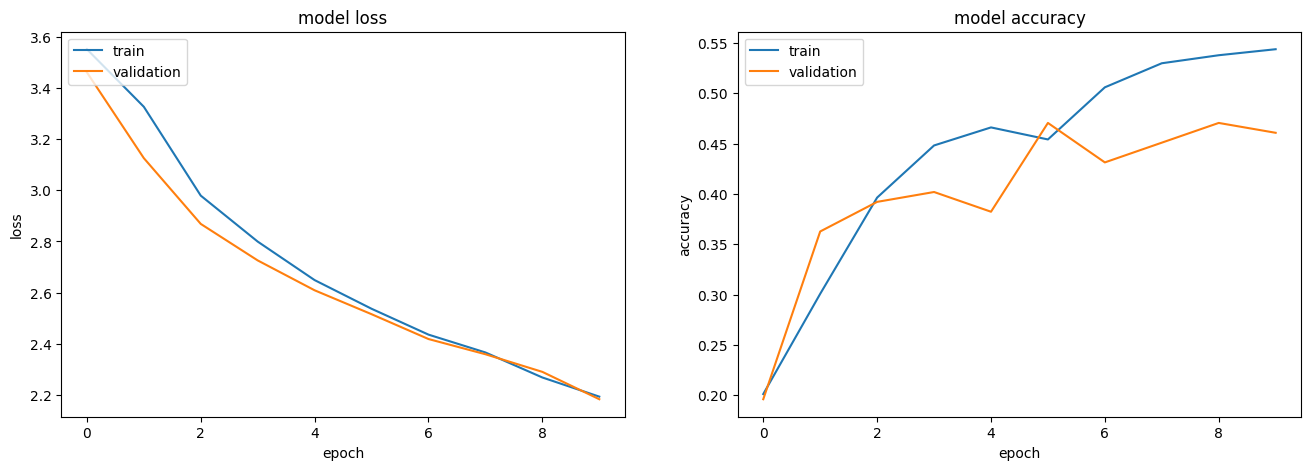

In [10]:
plt.figure(figsize=(16,5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

In [11]:
model.save('Intel_image_classification_model.h5')

In [12]:
def get_images(directory):
    Images = []
    pred_img_cnt = 25  

    i = 0

    for image_file in os.listdir(directory):        
        i += 1
        if i > pred_img_cnt: break
        else:
            image = cv2.imread(directory+r'/'+image_file)
            image = cv2.resize(image,(150,150))          
            Images.append(image)
    return Images

In [13]:
pred_images = get_images('c:/workspace3/data/images/intel-image-classification/seg_pred/seg_pred')
pred_images = np.array(pred_images) * 1./255

pred_images.shape

(25, 150, 150, 3)

In [14]:
prediction = model.predict(pred_images, verbose=1)

print(prediction[0])
print(np.argmax(prediction[0]))

1/1 [==============================] - 1s 550ms/step
[0.09814426 0.04077332 0.00489537 0.00202262 0.01563707 0.8385274 ]
5


C:\Users\tjoeun\AppData\Local\Temp\ipykernel_7700\1322643807.py:42: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


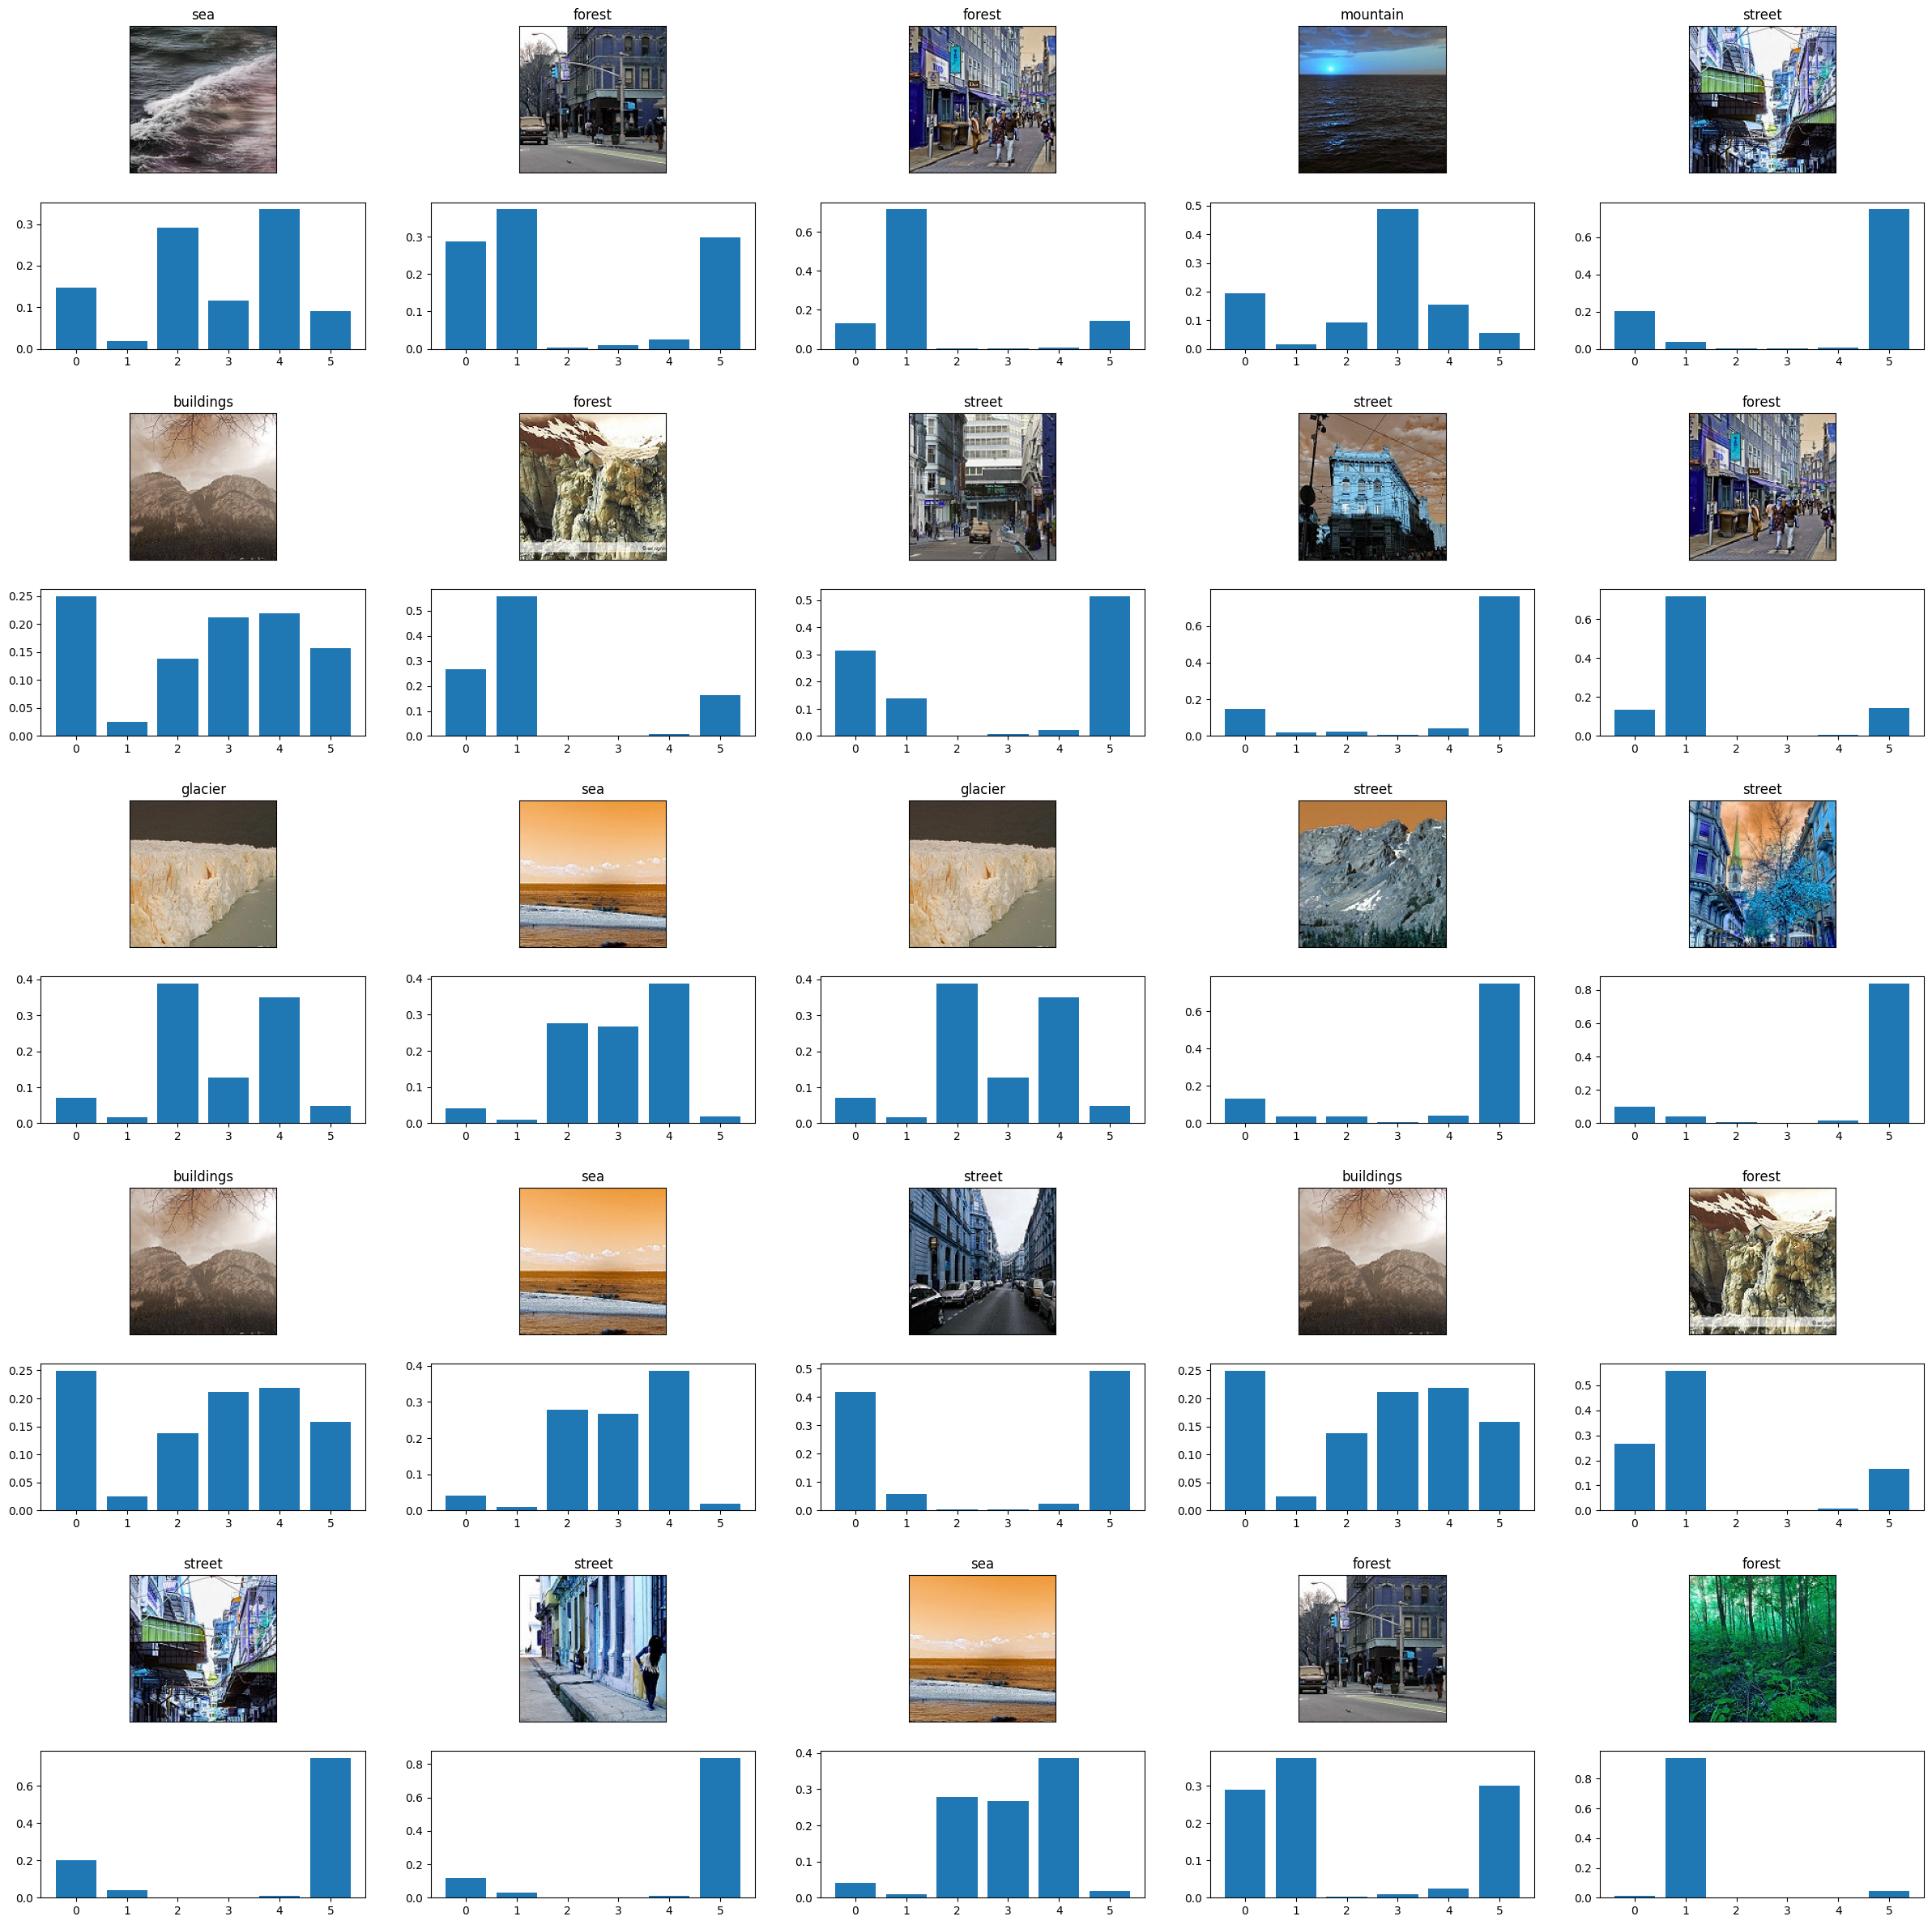

In [15]:
fig = plt.figure(figsize=(30, 30))
outer = gridspec.GridSpec(5, 5) #5행 5열

for i in range(25):
    # 각 행마다 2행 1열의 서브그리드 생성
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,subplot_spec=outer[i])
    rnd_number = randint(0,len(pred_images)-1)
    pred_image = np.array([pred_images[rnd_number]])
    pred_class = findKey(train_generator.class_indices, np.argmax(prediction[rnd_number]))
    pred_prob = prediction[rnd_number].reshape(6)  

    for j in range(2):
        if (j%2) == 0: #이미지, 타이틀
            ax = plt.Subplot(fig, inner[j])
            ax.imshow(pred_image[0])
            ax.set_title(pred_class)
            ax.set_xticks([])
            ax.set_yticks([])
            fig.add_subplot(ax)

        else: # 확률값
            ax = plt.Subplot(fig, inner[j])
            ax.bar([0,1,2,3,4,5],pred_prob)
            fig.add_subplot(ax)
fig.show()